## **Proyecto IA 2**                                 
### **Estudiantes:**                      
Jhordanth Fabian Villamizar Peñaranda  
Yerson Stewell Ibarra Rueda
  
# **Identificación de fracturas oseas en radiografías.**
  
Las fracturas vertebrales se asocian más frecuentemente a edad geriátrica y etiología osteoporótica. Clínicamente, un gran número de ellas son asintomáticas, sin embargo esto no les resta importancia.  El correcto diagnóstico de una fractura vertebral va a suponer un buen manejo terapéutico que sirva de prevención para la aparición de nuevas fracturas tanto vertebrales como no vertebrales y con ello una menor morbimortalidad.

Se analiza mediante un estudio transversal, el diagnóstico de fracturas vertebrales en la radiografía lateral de tórax y la comparan con la radiografía de columna del mismo paciente.

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Identificación-de-fracturas-Oseas-en-radiografías/archive (6)')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/Identificación-de-fracturas-Oseas-en-radiografías/archive (6)


In [28]:
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras


In [3]:
test_path = './val'
train_path = './train'

In [4]:
train_datagen = image.ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, rotation_range=45, horizontal_flip=True)
val_datagen= image.ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, rotation_range=45, horizontal_flip=True)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    shuffle=True,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    shuffle=True,
    class_mode = 'binary')

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
model_in_do_ba = tf.keras.models.Sequential()
model_in_do_ba.add(tf.keras.layers.Conv2D(224, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(224, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Dropout(0.3))
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.GlobalAveragePooling2D())
model_in_do_ba.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_in_do_ba.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 224)     6272      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 224)    896       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 224)     451808    
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 224)    896       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 224)    0         
 )                                                               
                                                        

Epoch 1/20
100/100 [==============================] - 412s 4s/step - loss: 0.6560 - accuracy: 0.6122 - precision: 0.6008 - val_loss: 3.8380 - val_accuracy: 0.6000 - val_precision: 0.0000e+00
Epoch 2/20
100/100 [==============================] - 229s 2s/step - loss: 0.6212 - accuracy: 0.6480 - precision: 0.6343 - val_loss: 0.9963 - val_accuracy: 0.5733 - val_precision: 0.2647
Epoch 3/20
100/100 [==============================] - 199s 2s/step - loss: 0.6003 - accuracy: 0.6708 - precision: 0.6542 - val_loss: 0.6367 - val_accuracy: 0.5633 - val_precision: 0.4267
Epoch 4/20
100/100 [==============================] - 194s 2s/step - loss: 0.5792 - accuracy: 0.6634 - precision: 0.6541 - val_loss: 2.5958 - val_accuracy: 0.6000 - val_precision: 0.0000e+00
Epoch 5/20
100/100 [==============================] - 193s 2s/step - loss: 0.5620 - accuracy: 0.6994 - precision: 0.6840 - val_loss: 0.7625 - val_accuracy: 0.6150 - val_precision: 0.5119
Epoch 6/20
100/100 [==============================] - 193

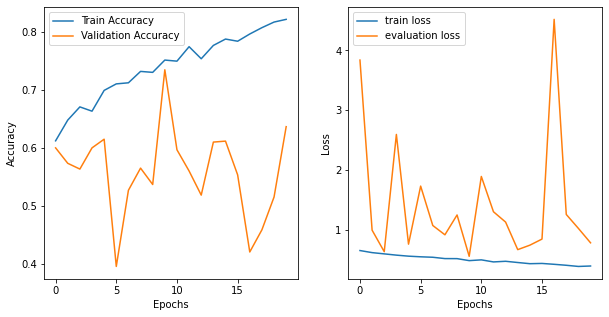

In [ ]:
model_in_do_ba.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision'])
import matplotlib.pyplot as plt
history = model_in_do_ba.fit(train_generator, epochs=20,verbose=1,steps_per_epoch= 100,validation_data=validation_generator)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_A = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)

model_A.trainable = False

model_B = Sequential()
model_B.add(model_A)
model_B.add(GlobalAveragePooling2D())
model_B.add(Dense(128))
model_B.add(Dense(64))
model_B.add(Dense(1, activation='sigmoid'))

model_B.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)               163968    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                         

In [ ]:
model_B.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision'])
history = model_B.fit(train_generator, epochs=10,verbose=1,steps_per_epoch= 50,validation_data=validation_generator)

Epoch 1/10
50/50 [==============================] - 79s 2s/step - loss: 1.0554 - accuracy: 0.5462 - precision: 0.5507 - val_loss: 0.6537 - val_accuracy: 0.6150 - val_precision: 0.5150
Epoch 2/10
50/50 [==============================] - 66s 1s/step - loss: 0.6923 - accuracy: 0.5750 - precision: 0.5756 - val_loss: 0.6562 - val_accuracy: 0.6000 - val_precision: 0.5000
Epoch 3/10
50/50 [==============================] - 61s 1s/step - loss: 0.6564 - accuracy: 0.6119 - precision: 0.5873 - val_loss: 0.6096 - val_accuracy: 0.6483 - val_precision: 0.6629
Epoch 4/10
50/50 [==============================] - 57s 1s/step - loss: 0.6747 - accuracy: 0.6012 - precision: 0.5881 - val_loss: 0.6638 - val_accuracy: 0.6217 - val_precision: 0.7600
Epoch 5/10
50/50 [==============================] - 50s 994ms/step - loss: 0.6720 - accuracy: 0.5913 - precision: 0.5925 - val_loss: 0.6292 - val_accuracy: 0.6633 - val_precision: 0.5613
Epoch 6/10
50/50 [==============================] - 47s 933ms/step - loss: 0.

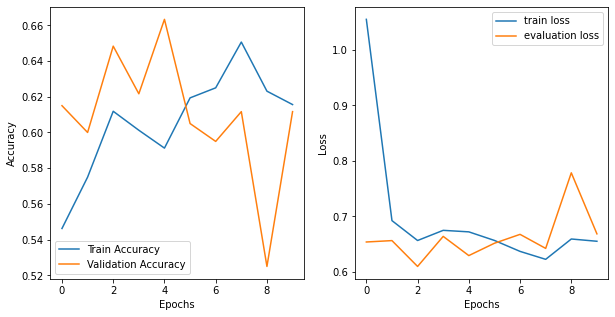

In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

#usado la inseption

In [62]:
model_A = tf.keras.applications.InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)

model_A.trainable = False

model_B = Sequential()
model_B.add(model_A)
model_B.add(GlobalAveragePooling2D())
model_B.add(Dense(64))
model_B.add(Dense(32))
model_B.add(Dense(1, activation='sigmoid'))

model_B.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 64)                131136    
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,936,033
Trainable params: 133,249
Non-trainable params: 21,802,784
____________________________________

In [63]:
model_B.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision'])
history = model_B.fit(train_generator, epochs=20,verbose=1,steps_per_epoch= 100,validation_data=validation_generator,callbacks=[EarlyStopping(patience=5, restore_best_weights = True)])

Epoch 1/20
100/100 [==============================] - 64s 580ms/step - loss: 5.9737 - accuracy: 0.5330 - precision: 0.5389 - val_loss: 1.1692 - val_accuracy: 0.5867 - val_precision: 0.4800
Epoch 2/20
100/100 [==============================] - 54s 539ms/step - loss: 1.2749 - accuracy: 0.5791 - precision: 0.5663 - val_loss: 1.1504 - val_accuracy: 0.5500 - val_precision: 0.4659
Epoch 3/20
100/100 [==============================] - 55s 547ms/step - loss: 1.0280 - accuracy: 0.6027 - precision: 0.5874 - val_loss: 1.4057 - val_accuracy: 0.4717 - val_precision: 0.4283
Epoch 4/20
100/100 [==============================] - 54s 538ms/step - loss: 0.8224 - accuracy: 0.5966 - precision: 0.5945 - val_loss: 1.0437 - val_accuracy: 0.5250 - val_precision: 0.4547
Epoch 5/20
100/100 [==============================] - 53s 535ms/step - loss: 0.7336 - accuracy: 0.6144 - precision: 0.6079 - val_loss: 0.6996 - val_accuracy: 0.5983 - val_precision: 0.4968
Epoch 6/20
100/100 [==============================] - 5

In [64]:
model_B.save('/content/drive/MyDrive/Identificación-de-fracturas-Oseas-en-radiografías/modelFirstTrain.h5')

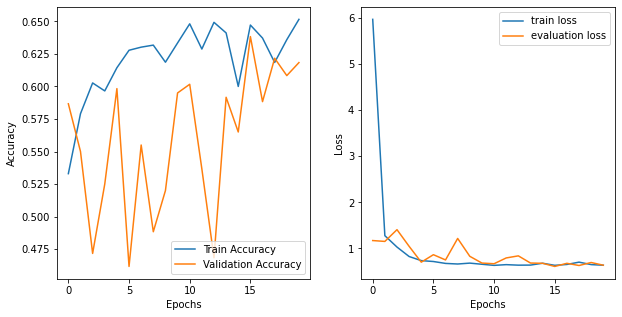

In [65]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [66]:
model_A.trainable = True
print("Total ayers of model_B_on_A: ", len(model_A.layers))
for layer in model_A.layers[:250]:
 layer.trainable =  False
model_B.summary()
len(model_B.trainable_variables)

Total ayers of model_B_on_A:  311
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 64)                131136    
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,936,033
Trainable params: 10,674,689
Non-trainable params: 11,261,344

41

In [67]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model_B.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy','Precision'])
history = model_B.fit(train_generator, epochs=10,verbose=1,steps_per_epoch= 100,validation_data=validation_generator,callbacks=[EarlyStopping(patience=3, restore_best_weights = True)])

Epoch 1/10
100/100 [==============================] - 64s 550ms/step - loss: 0.6402 - accuracy: 0.6256 - precision: 0.6154 - val_loss: 1.3914 - val_accuracy: 0.5767 - val_precision: 0.2941
Epoch 2/10
100/100 [==============================] - 54s 535ms/step - loss: 0.5665 - accuracy: 0.6944 - precision: 0.6712 - val_loss: 0.9295 - val_accuracy: 0.6400 - val_precision: 0.5264
Epoch 3/10
100/100 [==============================] - 54s 543ms/step - loss: 0.5218 - accuracy: 0.7359 - precision: 0.7127 - val_loss: 0.8816 - val_accuracy: 0.6067 - val_precision: 0.5075
Epoch 4/10
100/100 [==============================] - 53s 534ms/step - loss: 0.4725 - accuracy: 0.7666 - precision: 0.7365 - val_loss: 1.2823 - val_accuracy: 0.6000 - val_precision: 0.5000
Epoch 5/10
100/100 [==============================] - 54s 542ms/step - loss: 0.4523 - accuracy: 0.7806 - precision: 0.7439 - val_loss: 0.7392 - val_accuracy: 0.5833 - val_precision: 0.4859
Epoch 6/10
100/100 [==============================] - 5

In [68]:
model_A.trainable = True
print("Total ayers of model_B_on_A: ", len(model_A.layers))
for layer in model_A.layers[:120]:
 layer.trainable =  False
model_B.summary()
len(model_B.trainable_variables)

Total ayers of model_B_on_A:  311
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 64)                131136    
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,936,033
Trainable params: 19,103,489
Non-trainable params: 2,832,544


122

In [69]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00025)
model_B.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy','Precision'])
history = model_B.fit(train_generator, epochs=10,verbose=1,steps_per_epoch= 100,validation_data=validation_generator,callbacks=[EarlyStopping(patience=4, restore_best_weights = True)])

Epoch 1/10
100/100 [==============================] - 79s 577ms/step - loss: 0.6555 - accuracy: 0.6221 - precision: 0.6034 - val_loss: 0.7226 - val_accuracy: 0.4000 - val_precision: 0.4000
Epoch 2/10
100/100 [==============================] - 56s 558ms/step - loss: 0.5096 - accuracy: 0.7465 - precision: 0.7245 - val_loss: 0.7005 - val_accuracy: 0.5983 - val_precision: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 57s 569ms/step - loss: 0.4388 - accuracy: 0.7977 - precision: 0.7813 - val_loss: 0.7359 - val_accuracy: 0.6000 - val_precision: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 55s 552ms/step - loss: 0.3553 - accuracy: 0.8534 - precision: 0.8404 - val_loss: 0.7244 - val_accuracy: 0.6000 - val_precision: 0.0000e+00
Epoch 5/10
100/100 [==============================] - 56s 557ms/step - loss: 0.2806 - accuracy: 0.8831 - precision: 0.8676 - val_loss: 0.8403 - val_accuracy: 0.5967 - val_precision: 0.0000e+00
Epoch 6/10
100/100 [===================

In [72]:
model_B.save("/content/drive/MyDrive/Identificación-de-fracturas-Oseas-en-radiografías/model_Trained_B.hdf5")

In [70]:
model_A.trainable = True
# print("Total ayers of model_B_on_A: ", len(model_A.layers))
# for layer in model_A.layers[:]:
#  layer.trainable =  False
model_B.summary()
len(model_B.trainable_variables)

Total ayers of model_B_on_A:  311
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 64)                131136    
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,936,033
Trainable params: 133,249
Non-trainable params: 21,802,784
__

6

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model_B.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy','Precision'])
history = model_B.fit(train_generator, epochs=10,verbose=1,steps_per_epoch= 100,validation_data=validation_generator,callbacks=[EarlyStopping(patience=5, restore_best_weights = True)])

Epoch 1/10
100/100 [==============================] - 60s 551ms/step - loss: 0.1997 - accuracy: 0.9219 - precision: 0.9364 - val_loss: 0.6286 - val_accuracy: 0.7517 - val_precision: 0.6798
Epoch 2/10
100/100 [==============================] - 53s 535ms/step - loss: 0.2171 - accuracy: 0.9119 - precision: 0.9273 - val_loss: 0.6318 - val_accuracy: 0.7650 - val_precision: 0.6749
Epoch 3/10
100/100 [==============================] - 53s 530ms/step - loss: 0.2211 - accuracy: 0.9109 - precision: 0.9158 - val_loss: 0.6539 - val_accuracy: 0.7400 - val_precision: 0.6448
Epoch 4/10
100/100 [==============================] - 53s 535ms/step - loss: 0.2123 - accuracy: 0.9150 - precision: 0.9240 - val_loss: 0.5869 - val_accuracy: 0.7517 - val_precision: 0.6619
Epoch 5/10
100/100 [==============================] - ETA: 0s - loss: 0.2170 - accuracy: 0.9050 - precision: 0.9110